In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
# clean the descriptions
import nltk
from nltk.corpus import stopwords # import stopwords 
from string import punctuation # import punctuations
from nltk.corpus import wordnet # to check if a word is english
from nltk.stem import PorterStemmer #Porter stemming algorithm to remove and replace well-known suffixes of English words
# Create the vocabularies
from collections import defaultdict
import math
import json
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy import sparse
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
def read_announcement(soup):
    df_results_1 = pd.DataFrame(columns=["Title", "Price", "Locali", "Superficie", "Bagni", "Piano", "Description URL"])
    for ul in soup.find_all('ul'):
        title, price, locali, superficie, bagni, piano = [None]*6
        if ul.get("class") == ["listing-features", "list-piped"]:

            # Title of the Announcement
            title = ul.find_previous_sibling("p").a.text

            for li in ul.find_all("li"):
                # Price
                if (li.get("class")) == ['lif__item','lif__pricing']:
                    s=li.text
                    if re.search(r'[\d]+.[\d]{3}.[\d]{3}',s):
                        price=re.findall(r'[\d]+.[\d]{3}.[\d]{3}',s)[0]
                        price=int(price.replace('.',''))
                    elif re.search(r'[\d]+.[\d]{3}',s):
                        price=re.findall(r'[\d]+.[\d]{3}',s)[0]
                        price=int(price.replace('.',''))

            # Locali
            for div in ul.find_all('div' , text="locali"): # there is only one div with text = "locali" in a single "ul"
                if div.get("class") == ["lif__text", "lif--muted"]:
                    s=div.previous_sibling.span.text
                    s=s.replace('+','')
                    l=s.split('-')
                    locali=l[len(l)-1]

            # Superficie
            for div in ul.find_all('div' , text="superficie"): # there is only one div with text = "superficie" in a single "ul"
                if div.get("class") == ["lif__text", "lif--muted"]:
                    superficie = div.previous_sibling.span.text

            # Bagni
            for div in ul.find_all('div' , text="bagni"): # there is only one div with text = "bagni" in a single "ul"
                if div.get("class") == ["lif__text", "lif--muted"]:
                    bagni = div.previous_sibling.span.text
                    bagni=int(bagni.replace('+',''))

            # Piano
            for div in ul.find_all('div' , text="piano"): # there is only one div with text = "piano" in a single "ul"
                if div.get("class") == ["lif__text", "lif--muted"]:
                    piano = div.previous_sibling.abbr.get("title")

            # Append all the features in the dataframe using a temporary df
            list_to_append = [[title, price, locali, superficie, bagni, piano]]

            # It's possible that not all the announcements will have all the fields mentioned above, 
            # if it's the case don't take it into account.
            if None in list_to_append[0]:
                continue
                
            # If the announcement has all the features we save also the url to the the description
            url = ul.find_previous_sibling("p").a.get("href")
            list_to_append[0].append(url)

            df_temp = pd.DataFrame(list_to_append, columns=["Title", "Price", "Locali", "Superficie", "Bagni", "Piano", "Description URL"] )       
            df_results_1 = pd.concat([df_results_1, df_temp], ignore_index=True)

    return df_results_1

In [7]:
# create empty dataframe to visualize the results of the query
df_final = pd.DataFrame(columns=["Title", "Price", "Locali", "Superficie", "Bagni", "Piano"])

pag = 1
while len(df_final) < 10000:
    source = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=" + str(pag))
    print(pag)
    soup = BeautifulSoup(source.text, "html.parser") # try also "html.parser"
    df_new_page = read_announcement(soup)
    df_final = pd.concat([df_final, df_new_page], ignore_index=True)
    print("Pag:", pag, "we have collected:", len(df_final), "elements")
    pag += 1

1


C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Pag: 1 we have collected: 22 elements
2
Pag: 2 we have collected: 46 elements
3
Pag: 3 we have collected: 67 elements
4
Pag: 4 we have collected: 90 elements
5
Pag: 5 we have collected: 113 elements
6
Pag: 6 we have collected: 130 elements
7
Pag: 7 we have collected: 150 elements
8
Pag: 8 we have collected: 171 elements
9
Pag: 9 we have collected: 193 elements
10
Pag: 10 we have collected: 215 elements
11
Pag: 11 we have collected: 237 elements
12
Pag: 12 we have collected: 256 elements
13
Pag: 13 we have collected: 279 elements
14
Pag: 14 we have collected: 299 elements
15
Pag: 15 we have collected: 320 elements
16
Pag: 16 we have collected: 343 elements
17
Pag: 17 we have collected: 358 elements
18
Pag: 18 we have collected: 377 elements
19
Pag: 19 we have collected: 396 elements
20
Pag: 20 we have collected: 415 elements
21
Pag: 21 we have collected: 434 elements
22
Pag: 22 we have collected: 454 elements
23
Pag: 23 we have collected: 477 elements
24
Pag: 24 we have collected: 498 e

Pag: 185 we have collected: 3851 elements
186
Pag: 186 we have collected: 3865 elements
187
Pag: 187 we have collected: 3880 elements
188
Pag: 188 we have collected: 3880 elements
189
Pag: 189 we have collected: 3899 elements
190
Pag: 190 we have collected: 3921 elements
191
Pag: 191 we have collected: 3939 elements
192
Pag: 192 we have collected: 3958 elements
193
Pag: 193 we have collected: 3982 elements
194
Pag: 194 we have collected: 4003 elements
195
Pag: 195 we have collected: 4023 elements
196
Pag: 196 we have collected: 4044 elements
197
Pag: 197 we have collected: 4067 elements
198
Pag: 198 we have collected: 4091 elements
199
Pag: 199 we have collected: 4113 elements
200
Pag: 200 we have collected: 4137 elements
201
Pag: 201 we have collected: 4157 elements
202
Pag: 202 we have collected: 4180 elements
203
Pag: 203 we have collected: 4198 elements
204
Pag: 204 we have collected: 4219 elements
205
Pag: 205 we have collected: 4240 elements
206
Pag: 206 we have collected: 4261 e

364
Pag: 364 we have collected: 7415 elements
365
Pag: 365 we have collected: 7435 elements
366
Pag: 366 we have collected: 7459 elements
367
Pag: 367 we have collected: 7481 elements
368
Pag: 368 we have collected: 7488 elements
369
Pag: 369 we have collected: 7500 elements
370
Pag: 370 we have collected: 7517 elements
371
Pag: 371 we have collected: 7535 elements
372
Pag: 372 we have collected: 7553 elements
373
Pag: 373 we have collected: 7568 elements
374
Pag: 374 we have collected: 7584 elements
375
Pag: 375 we have collected: 7601 elements
376
Pag: 376 we have collected: 7615 elements
377
Pag: 377 we have collected: 7627 elements
378
Pag: 378 we have collected: 7639 elements
379
Pag: 379 we have collected: 7654 elements
380
Pag: 380 we have collected: 7669 elements
381
Pag: 381 we have collected: 7683 elements
382
Pag: 382 we have collected: 7697 elements
383
Pag: 383 we have collected: 7713 elements
384
Pag: 384 we have collected: 7727 elements
385
Pag: 385 we have collected: 77

In [8]:
pd.options.display.max_colwidth = -1
df_final.head(100)

,Bagni,Description URL,Locali,Piano,Price,Superficie,Title
0,1,https://www.immobiliare.it/53131931-Vendita-Bilocale-viale-Italo-Calvino-Roma.html,2,1,225000,50,"Bilocale viale Italo Calvino, Fonte Ostiense, Roma"
1,1,https://www.immobiliare.it/70085240-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,3,3,400000,60,"Trilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
2,2,https://www.immobiliare.it/70084602-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,3,3,500000,89,"Trilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
3,2,https://www.immobiliare.it/70100018-Vendita-Quadrilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,4,5,574000,89,"Quadrilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
4,1,https://www.immobiliare.it/70085670-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,2,4,300000,46,"Bilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
5,2,https://www.immobiliare.it/70085950-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-Roma.html,3,4,425000,72,"Trilocale piazza San Giovanni di Dio, Monteverde Nuovo, Roma"
6,2,https://www.immobiliare.it/70086882-Vendita-Appartamento-piazza-San-Giovanni-di-Dio-39-Roma.html,5,4,669000,86,"Appartamento piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
7,2,https://www.immobiliare.it/70100304-Vendita-Attico-Mansarda-piazza-San-Giovanni-di-Dio-39-Roma.html,5,5,657000,87,"Attico / Mansarda piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
8,1,https://www.immobiliare.it/53973750-Vendita-Trilocale-via-Maso-Finiguerra-27C-D-Roma.html,3,1,257000,61,"Trilocale via Maso Finiguerra 27C-D, Romanina, Roma"
9,1,https://www.immobiliare.it/70082804-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,2,3,325000,60,"Bilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"


In [9]:
# to build the dataframe it takes 15/20 min for this reasone we save it in a csv file
df_final.to_csv('announcement.csv', index = False)

In [5]:
del(df_final)

In [10]:
data = pd.read_csv("announcement.csv")
data.head(100)

,Bagni,Description URL,Locali,Piano,Price,Superficie,Title
0,1,https://www.immobiliare.it/53131931-Vendita-Bilocale-viale-Italo-Calvino-Roma.html,2,1,225000,50.0,"Bilocale viale Italo Calvino, Fonte Ostiense, Roma"
1,1,https://www.immobiliare.it/70085240-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,3,3,400000,60.0,"Trilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
2,2,https://www.immobiliare.it/70084602-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,3,3,500000,89.0,"Trilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
3,2,https://www.immobiliare.it/70100018-Vendita-Quadrilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,4,5,574000,89.0,"Quadrilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
4,1,https://www.immobiliare.it/70085670-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,2,4,300000,46.0,"Bilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
5,2,https://www.immobiliare.it/70085950-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-Roma.html,3,4,425000,72.0,"Trilocale piazza San Giovanni di Dio, Monteverde Nuovo, Roma"
6,2,https://www.immobiliare.it/70086882-Vendita-Appartamento-piazza-San-Giovanni-di-Dio-39-Roma.html,5,4,669000,86.0,"Appartamento piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
7,2,https://www.immobiliare.it/70100304-Vendita-Attico-Mansarda-piazza-San-Giovanni-di-Dio-39-Roma.html,5,5,657000,87.0,"Attico / Mansarda piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"
8,1,https://www.immobiliare.it/53973750-Vendita-Trilocale-via-Maso-Finiguerra-27C-D-Roma.html,3,1,257000,61.0,"Trilocale via Maso Finiguerra 27C-D, Romanina, Roma"
9,1,https://www.immobiliare.it/70082804-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html,2,3,325000,60.0,"Bilocale piazza San Giovanni di Dio 39, Monteverde Nuovo, Roma"


## Clean Function

In [11]:
nltk.download('wordnet') # download the italian words
nltk.download('omw')
nltk.download("stopwords") # download the stopwords

# create a set of english stopwords and punctuations 
stop_words = set(stopwords.words('italian')+list(punctuation)) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mvice\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\mvice\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def cleaning_function(unclnd_string):
    stemmer = PorterStemmer() # instantiate the PorterStemmer class
    clnd_string = ""  # create an empty string 
    
    for single_word in str(unclnd_string).split(): # read every feature word by word
        
        ##### PUNCTUATION CHECK 
        # the variable "wrong_char" is a set of the punctuation in "single_word"
        wrong_char = set(single_word).intersection(punctuation)
        # for loop for every wrong charachter contained in "single_word"
        for wrg in wrong_char:
            single_word = single_word.replace( wrg, "" ) # remove the punctuation 
        ##### Italian OR NUMBER CHECK    
        if (not wordnet.synsets(single_word, lang='ita')) and not (single_word.isdigit()):
            # Not an italian Word
            continue # Skip the word
        ##### STEMMING       
        single_word = stemmer.stem(single_word) # remove affixes from a word
        ##### STOPWORD 
        if (single_word not in stop_words) and (single_word != ''): # remove the word if it is a stopword 
            clnd_string = (clnd_string + " " + single_word.lower())  # append words in the string created earlier 
            
    clnd_string = clnd_string[1:] # remove the final space
        
    return(clnd_string)

## Read all the descriptions, clean and save them

In [ ]:
for ind, url in enumerate(data["Description URL"]):
    source_descr = requests.get(url)
    soup_descr = BeautifulSoup(source_descr.text, "html.parser")
    div_descr = soup_descr.find_all("div", {"class" : "col-xs-12 description-text text-compressed"})
    
    if list(div_descr) == []:
        print(ind)
        file = open("description_documents/doc_" + str(ind) + ".txt", "w", encoding="utf8")
        file.write("")
        file.close()
        continue
    else:
        descr = cleaning_function(div_descr[0].div.text)
        file = open("description_documents/doc_" + str(ind) + ".txt", "w", encoding="utf8")
        file.write(descr)
        file.close()

## Create the vocabularies

map_id_term = {"word0" : term_id_0, "word1": term_id_1 , "word2":term_id_2,....}

map_term_ID = { term_id_0 : "word0",  term_id_1 : "word1", term_id_2 : "word2", ... } 

vocabulary = { term_id : [document_id_0, document_id_1, document_id_2, ... ], ... }

Example:

map_id_term ={"case" : 0, "palazzo": 1 , "terrazzo":2,...} 

map_term_ID = { 0 : "casa", 1 : "palazzo", 2 : "terrazzo", ... }

vocabulary = { 0 : [23, 348, 873, 1239, ...], 1 : [738, 948, 6235], ... }

In [13]:
# give an id to each word
map_id_term = {}
# initialize a default dictionary to store which documents contain a specific word
vocabulary =  defaultdict(list)
problems=[]
numb_words = 0
for j in range(0,10000):
    if j % 1000 == 0:
        print(j)
    # open each tsv file
    try:
        with open("description_documents/doc_" + str(j) + ".txt" , encoding="utf8", mode='r') as txtfile:
            # is the csv reader where we specify the separator/delimeter
            new_file = txtfile.read()
            # i create a list with all the word separated of the Title and the Description
            list_of_words = new_file.split(" ") # maybe could be row1[0].split(" ")
            # for each word in this list i append the number of the document that contain this word
            for word in list_of_words:
                '''if word.isdigit():
                    continue
                else:'''
                if word not in map_id_term.keys():
                    map_id_term[word] = numb_words
                    numb_words += 1

                if j not in vocabulary[map_id_term[word]]:
                    vocabulary[map_id_term[word]].append(j)
    except:
        problems.append(j)
with open('map_id_term.json', 'w') as outfile:
    json.dump(map_id_term, outfile)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [18]:
map_term_ID={}
for i in map_id_term:
    map_term_ID[map_id_term[i]]=i
with open('map_term_ID.json', 'w') as outfile:
    json.dump(map_term_ID, outfile)

In [14]:
with open('vocabulary.json', 'w') as outfile:
    json.dump(vocabulary, outfile)

In [16]:
with open('vocabulary.json') as json_data:
    vocabulary= json.load(json_data)

In [19]:
def tf_idf ( term, document , D ):
    # the document is passed array like: a list of all the words
    # D is the number of document that contain the term
    
    # find the frequency
    freq = document.count(term) / len(document)
    
    # tf_idf computation
    tf_idf = math.log(10000/D) * freq
    
    return tf_idf

In [20]:
# initialize a dictonary where the keys are all the word in vocabulary
vocabulary_tfidf = {}
for i in range(10000):
    try:
        file = open("description_documents/doc_" + str(i) + ".txt", mode='r', encoding = "utf8")
        document=file.read()
        list_of_words = document.split()
        for word in list_of_words:
            if word.isdigit():
                continue
            else:
                idx_word=map_id_term[word]
                value_tf_idf=tf_idf(word,list_of_words,len(vocabulary[str(idx_word)]))
                v=tuple((idx_word,round(value_tf_idf,4)))
            if i in vocabulary_tfidf:
                vocabulary_tfidf[i].append(v)
            else:
                vocabulary_tfidf[i]=[v]
    except:
        problems.append(i)
with open('vocabulary_tfidf.json', 'w') as outfile:
    json.dump(vocabulary_tfidf, outfile)

## Build the tf idf Matrix

In [8]:
with open('vocabulary_tfidf.json') as json_data:
    vocabulary_tfidf= json.load(json_data)

In [21]:
M=np.zeros((10000,len(vocabulary)))
for i in vocabulary_tfidf:
    for j in vocabulary_tfidf[i]:
        v=j[0]
        T=j[1]
        M[int(i)][v]=T

In [22]:
M

array([[0.06  , 0.0605, 0.0492, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.0372, 0.0606, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

## CLUSTERING


To compute the clusters, we have to implement algorithms to creates two matrices. The first matrix will represent the informations about *bagni, locali, superifice, piano and  Price* ; the second one, instead, will have  *announcemnt_id* for the rows,  *word_id* for the columns, and it will represent the *tf_idf*

First of all we have to build a new matrix from the first DataFrame, we do it bacause we discovered some strange values inside the coloums *Piano, Bagni,Locaci,Superficie* such as *Ammezzato, Interrato* and so for. We convert this informations to integer with the functions below:

In [67]:
df=pd.read_csv('announcement.csv')

In [68]:
def clean_locali(s):
    s=int(re.findall(r'[\d]',s)[0])
    return(s)
def clean_superficie(s):
    s=int(s)
    return(s)
def clean_piano(s):
    try:
        s=int(s)
    except:
        if s=='>10' or s=='Ultimo':
            s=20
        if s=='Piano rialzato' or s=='Ammezzato':
            s=0.5
        if s=='Piano terra':
            s=0
        if s=='Seminterrato':
            s=-0.5
        if s=='Interrato':
            s=-1
    return(s)
def clean_Price(s):
    s=int(str(s).replace('.',''))
    return(s)

In [69]:
df['Locali']=df['Locali'].apply(clean_locali)
df['Piano']=df['Piano'].apply(clean_piano)
df['Superficie']=df['Superficie'].apply(clean_superficie)
df['Price']=df['Price'].apply(clean_Price)

Now we create a new DataFrame, so to have only the columns we need

In [70]:
df2=pd.DataFrame()

In [71]:
df2['Bagni']=df['Bagni']
df2['Locali']=df['Locali']
df2['Piano']=df['Piano']
df2['Superficie']=df['Superficie']
df2['Price']=df['Price']

In [90]:
K=df2.values


Now we can start computing **Elbow Method** for the firs Matrix

In [73]:
sd = {}
for k in range(1, 11):
    model = KMeans(k, init='k-means++')
    model.fit(K)
    # Getting the sum of squared distances of samples to closest cluster center
    sd[k] = model.inertia_
with open('sd.json', 'w') as outfile:
    json.dump(sd, outfile)

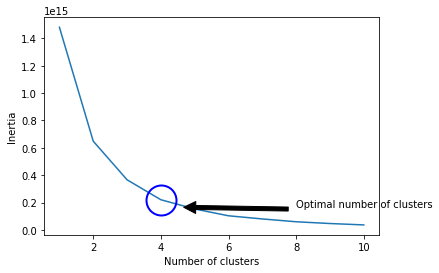

In [74]:
x = list(sd.keys())
y = list(sd.values())
fig = plt.figure()
plt.plot(x,y)
#we find out the best number of clusters
plt.plot(x[3], y[3], 'o', ms=30, mec='b', mfc='none', mew=2)
#adding a edges
plt.annotate('Optimal number of clusters', 
             xy=(4.5,166000000000000), xytext=(8,166000000000000),
             arrowprops = dict(facecolor='black', shrink=0.05))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
fig.savefig("optimal-clusters.png")

Thanks to this plot we discover the number of clusters we have to use, n=4. We can now start analyze the clusters.

In [75]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(K)

In [76]:
M=kmeans.labels_

We create a dictonary to represent in which cluster the appartment ID is


In [78]:
cluster_distribution={1:[],2:[],3:[],4:[]}
for i in range(len(M)):
    cluster_distribution[M[i]+1].append(i)
with open('cluster_distribution.json', 'w') as outfile:
    json.dump(cluster_distribution, outfile)

Now, form the docs of descripion, we create the second Matrix

In [79]:
def tf_idf ( term, document , D ):
    # the document is passed array like: a list of all the words
    # D is the number of document that contain the term
    
    # find the frequency
    freq = document.count(term) / len(document)
    
    # tf_idf computation
    tf_idf = math.log(10000/D) * freq
    
    return tf_idf

In [49]:
# initialize a dictonary where the keys are all the word in vocabulary
vocabulary_tfidf = {}
for i in range(10000):
    try:
        file = open("description_documents/doc_" + str(i) + ".txt", mode='r', encoding = "utf8")
        document=file.read()
        list_of_words = document.split()
        for word in list_of_words:
            if word.isdigit():
                continue
            else:
                idx_word=map_id_term[word]
                value_tf_idf=tf_idf(word,list_of_words,len(vocabulary[str(idx_word)]))
                v=tuple((idx_word,round(value_tf_idf,4)))
            if i in vocabulary_tfidf:
                vocabulary_tfidf[i].append(v)
            else:
                vocabulary_tfidf[i]=[v]
    except:
        problems.append(i)

with open('vocabulary_tfidf.json', 'w') as outfile:
    json.dump(vocabulary_tfidf, outfile)

In [80]:
with open('vocabulary_tfidf.json') as json_data:
    vocabulary_tfidf= json.load(json_data)

In [81]:
#We use Numpy: we start we a zeros array
M=np.zeros((10000,len(vocabulary)))
#filling the matrix with the tf_idf values
for i in vocabulary_tfidf:
    for j in vocabulary_tfidf[i]:
        v=j[0]
        T=j[1]
        M[int(i)][v]=T

THANKS TO THE LIBRARY SPICY WE MANAGE TO HAVE A *SPARSE* MATRIX, THIS ALLOWS TO MAKE A FASTER ALGORITHMS FOR THE **ELBOW METHOD**

In [82]:
sM = sparse.csr_matrix(M) 

In [10]:
sd2 = {}
for k in range(1, 11):
    model = KMeans(sM, init='k-means++')
    model.fit(sM)
    # Getting the sum of squared distances of samples to closest cluster center
    sd2[k] = model.inertia_
with open('sd2.json', 'w') as outfile:
    json.dump(sd2, outfile)

NameError: name 'sM' is not defined

In [55]:
with open('V.json') as json_data:
    V1= json.load(json_data)

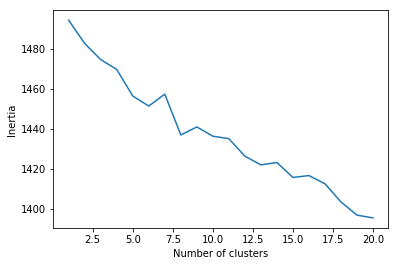

In [56]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = V1
fig = plt.figure()
plt.plot(x,y)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

As we can easly see from the plot we can't apply Elbow Method. We decided to use the number of cluster we found out from the matrix before.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(sM)

In [84]:
M2=kmeans.labels_

In [85]:
cluster_distribution1={1:[],2:[],3:[],4:[]}
for i in range(len(M2)):
    cluster_distribution1[M2[i]+1].append(i)
with open('cluster_distribution1.json', 'w') as outfile:
    json.dump(cluster_distribution1, outfile)

Now we have to compute Jaccard similarity to discover if the result between these two clusters are collerated or not.

In [89]:
with open('cluster_distribution.json') as json_data:
    cluster_distribution= json.load(json_data)
with open('cluster_distribution1.json') as json_data:
    cluster_distribution1= json.load(json_data)

In [164]:
def jaccard_similarity(lista1,lista2):
    inter=len(intersection(lista1,lista2))
    union=len(Union(lista1, lista2))
    res=round(inter/union,2)
    return res
              

In [59]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3
def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list

In [165]:
df3=pd.DataFrame(index=range(1,5), columns=range(1,5))
for i in range(1,5):
    for j in range(1,5):
        df3[i][j]=jaccard_similarity(cluster_distribution[str(i)], cluster_distribution1[str(j)])
df3

,1,2,3,4
1,0.24,0.05,0.01,0.6
2,0,0.01,0,0
3,0.07,0.04,0.01,0.11
4,0.05,0.02,0.01,0.06


In [5]:
with open('vocabulary_tfidf.json') as json_data:
    vocabulary_tfidf= json.load(json_data)

In [8]:
with open('vocabulary.json') as json_data:
    vocabulary= json.load(json_data)

In [107]:
def get_id_word(cluster_i, vocabulary_tfidf=vocabulary_tfidf):
    h=[]
    try:
        for doc in cluster_i:
            for ID in vocabulary_tfidf[str(doc)]:
                v=ID[0]
                h.append(v)
    except:
        pass
    return(h)

In [111]:
with open('map_term_ID.json') as json_data:
    map_term_ID= json.load(json_data)

In [117]:
def fromID_toSTR(lista, map_term_ID=map_term_ID):
    l=[]
    try:
        for j in lista:
            l.append(map_term_ID[str(j)])
        s=' '.join(l)
    except:
        pass
    return(s)
    

In [188]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [189]:
mask = np.array(Image.open("images.png"))
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [190]:
def crete_WordCloud(cluster1,cluster2): 
    h1=get_id_word(cluster1)
    h2=get_id_word(cluster2)
    s1=fromID_toSTR(h1)
    s2=fromID_toSTR(h2)
    stot=s1+' '+s2
    wordcloud = WordCloud(background_color='white', mask=transformed_mask).generate(stot)
    #image_colors = ImageColorGenerator(transformed_mask)
    plt.figure(figsize=[6,6])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return

**WORDCLOUD** FOR CLUSTER 1 =(1,1)

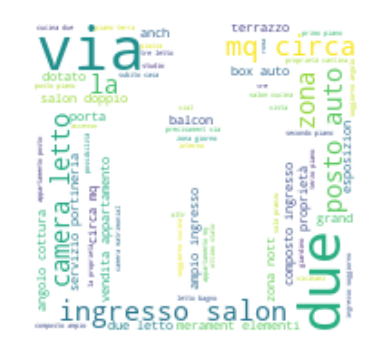

In [184]:
cluster1=cluster_distribution[str(1)]
cluster2=cluster_distribution1[str(1)]
crete_WordCloud(cluster1,cluster2)

**WORDCLOUD** FOR CLUSTER 2 =(3,4)

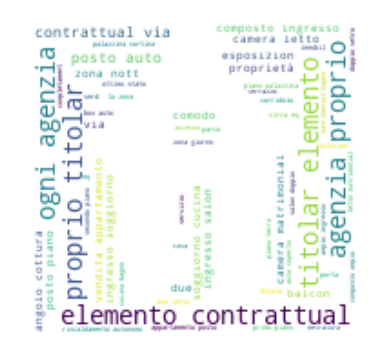

In [185]:
cluster1=cluster_distribution[str(3)]
cluster2=cluster_distribution1[str(4)]
crete_WordCloud(cluster1,cluster2)

**WORDCLOUD** FOR CLUSTER 3 =(3,4)

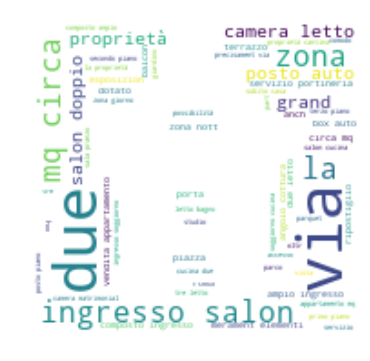

In [186]:
cluster1=cluster_distribution[str(3)]
cluster2=cluster_distribution1[str(1)]
crete_WordCloud(cluster1,cluster2)